# CIAO AO Explanation and Validation

In this notebook we explain and validate several aspects of CIAO's closed-loop operation. We start by validating the loop, by comparing CIAO's calculations with explicit calculations. Second, we validate CIAO's poke matrix methods by explicitly computing a poke matrix. Finally, we explain and validate the wavefront and residual error calculations.

## Explaining and validating the AO loop

Let's start by importing the CIAO modules and config files, as well as the scientific stack. Then we run the simulation check that is executed at the top of every CIAO script.

In [1]:
import sys,os
from sys import exit
import ciao_config as ccfg
import ciao
from matplotlib import pyplot as plt
import numpy as np


No module named pypylon
No module named ximea
[Errno 17] File exists: '.gui_settings'


In [2]:
if ccfg.simulate:
    sim = ciao.simulator.Simulator()
    cam = sim
    mirror = cam
else:
    cam = ciao.cameras.get_camera()
    mirror = ciao.mirrors.Mirror()
    
sensor = ciao.sensors.Sensor(cam)

if ccfg.simulate:
    # required to remove tip/tilt in simulated image
    sensor.record_reference()


Loading cached actuator basis set...
Loading cached zernike basis set...
recording reference
sensor paused
measurement 1 of 10 Sensor sense method
start -> cam.get_image: 28.491 ms
cam.get_image -> image stats: 0.160 ms
image stats -> estimate background: 0.145 ms
estimate background -> centroid: 0.339 ms
centroid -> reconstruct wavefront: 0.160 ms
reconstruct wavefront -> end sense: 0.001 ms

...done
measurement 2 of 10 Sensor sense method
start -> cam.get_image: 28.528 ms
cam.get_image -> image stats: 0.160 ms
image stats -> estimate background: 0.148 ms
estimate background -> centroid: 0.338 ms
centroid -> reconstruct wavefront: 0.158 ms
reconstruct wavefront -> end sense: 0.001 ms

...done
measurement 3 of 10 Sensor sense method
start -> cam.get_image: 29.689 ms
cam.get_image -> image stats: 0.192 ms
image stats -> estimate background: 0.186 ms
estimate background -> centroid: 0.458 ms
centroid -> reconstruct wavefront: 0.190 ms
reconstruct wavefront -> end sense: 0.002 ms

...done

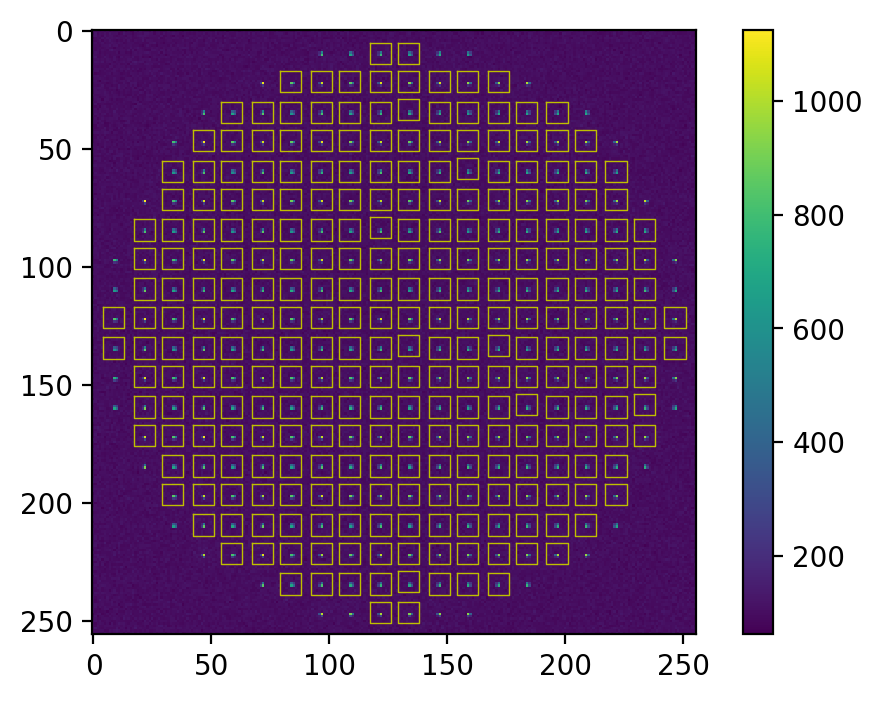

In [3]:
plt.figure(dpi=200)
plt.imshow(cam.get_image())
plt.colorbar()
plt.autoscale(False)
for y1,y2,x1,x2 in zip(sensor.search_boxes.y1,
                       sensor.search_boxes.y2,
                       sensor.search_boxes.x1,
                       sensor.search_boxes.x2):
    plt.plot([x1,x2-1,x2-1,x1,x1],[y1,y1,y2-1,y2-1,y1],'y-',linewidth=.5)

In [4]:
sensor.sense()

Sensor sense method
start -> cam.get_image: 30.494 ms
cam.get_image -> image stats: 0.163 ms
image stats -> estimate background: 0.148 ms
estimate background -> centroid: 0.370 ms
centroid -> reconstruct wavefront: 0.161 ms
reconstruct wavefront -> end sense: 0.001 ms



## Centroiding

Let's calculate the center of mass of the 20th lenslet, making sure we follow the same approach specified in ciao_config.py.

In [5]:
n_iterations = ccfg.centroiding_iterations
half_width= ccfg.search_box_half_width
iterative_step = ccfg.iterative_centroiding_step

# an explicit centroiding function
def centroid(spots,x_float,y_float,hw,n_iterations):
    x,y = int(round(x_float)),int(round(y_float))
        
    x1 = x - hw
    x2 = x + hw
    y1 = y - hw
    y2 = y + hw
    
    # first, survey edges to estimate background
    intensity = 0.0
    counter = 0.0
    
    for x in range(x1,x2+1):
        print spots[y1,x],spots[y2,x]
        intensity = intensity + float(spots[y1,x]) + float(spots[y2,x])
        counter = counter + 2.0
    for y in range(y1,y2+1):
        intensity = intensity + float(spots[y,x1]) + float(spots[y,x2])
        counter = counter + 2.0

    background = intensity/counter
    print spots.max(),spots.min()
    print intensity,counter,background
    return
    

    for k in range(n_iterations):
            pass
        

    #plt.subplot(1,2,1)
    plt.imshow(spots,cmap='gray')
    plt.xlim([x1,x2-1])
    plt.ylim([y2-1,y1])
    plt.autoscale(False)
    plt.plot(x_float,y_float,'r.')
    
    #plt.subplot(1,2,2)
    #plt.imshow(arr)
    
idx=5
x_float = sensor.search_boxes.x[idx]
y_float = sensor.search_boxes.y[idx]

centroid(sensor.cam.spots,x_float,y_float,half_width,n_iterations)
    

0.0013802544112405694 0.0011342070500890821
0.0017939033473062082 0.001407562989000415
0.0021791052020128385 0.001661595765944431
0.0025280712834354203 0.0018929004703882835
0.0028341078129490785 0.002098541710446281
0.0030917519161396236 0.0022760898067077434
0.0032968877843612167 0.002423620911993802
0.0034467795408503164 0.0025396648886887047
0.0035400075671202513 0.0026231022177518335
0.0035763196132745675 0.0026730275124671288
0.0035564245517263797 0.00268861094267723
0.7435900656724541 2.188109067547841e-06
0.112438857584 44.0 0.00255542858145
